In [4]:
from Binaries import *

### own trigger rate

In [5]:
n_trig, n_sum, rate, rate_err = np.loadtxt("/cr/tempdata01/filip/iRODS/MonitoringData/trigger_rates/nuria_trigger_rates_fixed.csv", usecols = [1, 2, 3, 4], unpack = True)

### online trigger rate

In [6]:
import uproot

def calculate_start_end(station):

    starts = data['fCalibration.fStartSecond'].array()[station]
    deltas = data['fCalibration.fEndSecond'].array()[station]
    stops = starts + deltas

    return starts, stops, deltas

file = uproot.open("/cr/tempdata01/filip/iRODS/MonitoringData/mc_2022_03_17_00h00.root:SDMonCal")
StationIDs = file['SDMonCalBranch']['fLsId'].array()
data = file['fCalibration']
Nuria = StationIDs == 56
start, stop, dt = calculate_start_end(Nuria)
t = ( 0.5 * (start + stop)  - 1331510418) / 3600
y = []

n_trig_online = []
deltas = data['fCalibration.fEndSecond'].array()[Nuria]

for j, trigger in enumerate(['fCalibration.fT2', 'fCalibration.fTotRate', 'fCalibration.fTotD', 'fCalibration.fMops']):

    if j != 1: y.append(data[trigger].array()[Nuria] / deltas)
    else: y.append(data[trigger].array()[Nuria])

# Th2 = x[0]
# ToT = x[0] + x[1]
n_trig_online_all = y[0] + y[1] + y[2] + y[3]
n_trig_online_th2 = y[0]

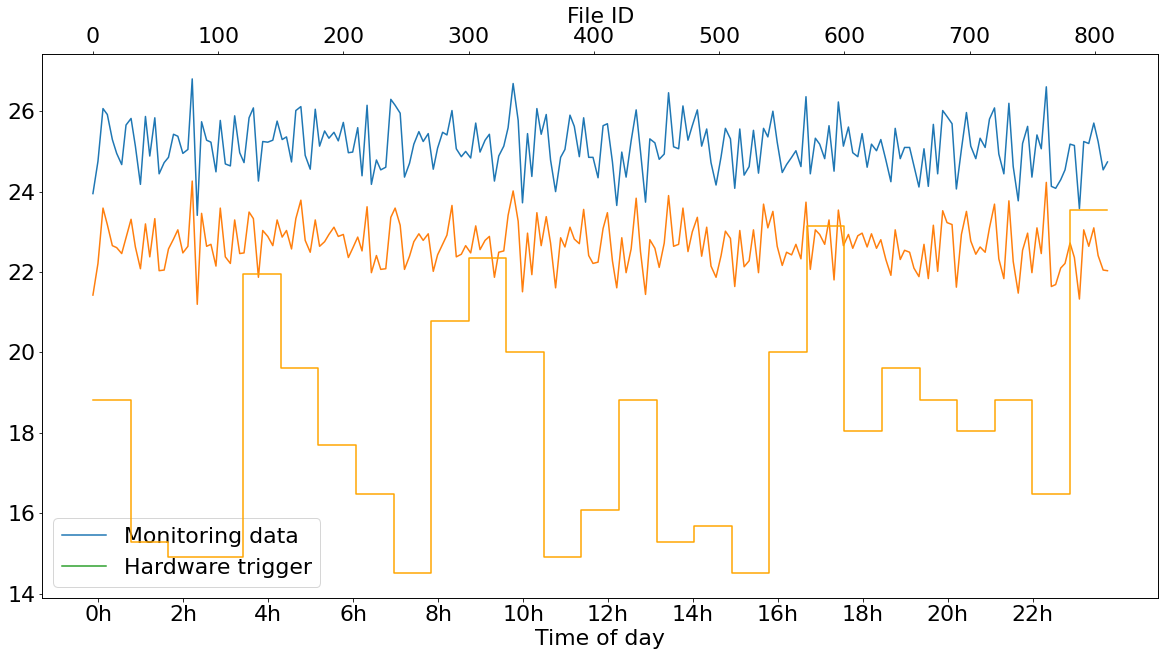

In [7]:
# Monitoring data

plt.rcParams["figure.figsize"] = [20,10]

ax1 = plt.gca()
ax1.set_xlabel("Time of day")
ax1.set_xticks(ticks = range(0, 24, 2), labels = [f"{h}h" for h in range(0, 24, 2)])
ax1.plot(t, n_trig_online_all, label = "Monitoring data")
ax1.plot(t, n_trig_online_th2)
ax1.plot([],[], label = "Hardware trigger")

ax2 = ax1.twiny()
ax2.set_xlabel("File ID")


# Own estimate

single_trace_duration = GLOBAL.single_bin_duration * GLOBAL.n_bins
combine_files = 30
n_trig_own = []
file_ids = []

for i in range(0, len(n_trig), combine_files):

    try:
        sum_trigger = sum(n_trig[i : i + combine_files])
        sum_total = sum(n_sum[i : i + combine_files])
    except IndexError:
        sum_trigger = sum(n_trig[i : -1])
        sum_total = sum(n_sum[i : -1])

    rate = sum_trigger / (sum_total * single_trace_duration)

    file_ids.append(i), file_ids.append(i + combine_files)
    n_trig_own.append(rate), n_trig_own.append(rate)

plt.plot(file_ids, n_trig_own, c = "orange")

ax1.legend()
